In [1]:
from modsim import *

In [3]:
def make_system(T_init, volume, r, t_end):
    return System(T_init=T_init,
                  T_final=T_init, 
                  T_env=22, 
                  volume=volume, r=r, 
                  t_0=0, t_end=t_end,dt=1)

def change_func(t, T, system):
    return -system.r * (T - system.T_env) * system.dt

def run_simulation(system, change_func):
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)
    series = TimeSeries(index=t_array)
    series.iloc[0] = system.T_init
    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)
    system.T_final = series.iloc[-1]
    return series  

In [4]:
def mix(system_coffee, system_milk):
    V1, V2 = system_coffee.volume, system_milk.volume
    T1, T2 = system_coffee.T_final, system_milk.T_final
    V_mix = V1 + V2
    T_mix = (V1 * T1 + V2 * T2) / V_mix
    return make_system(T_mix, V_mix, system_coffee.r, system_coffee.t_end)

In [15]:
r_coffee = 0.011543084190599507
coffee = make_system(T_init=90, volume=300, r=r_coffee, t_end=30)
r_milk = 0.1329607815660008
milk = make_system(T_init=5, volume=50, r=r_milk, t_end=30)

In [16]:
mix_first = mix(coffee, milk)
run_simulation(mix_first, change_func)
mix_first.T_final

np.float64(61.42857189931622)

In [17]:
run_simulation(coffee, change_func)
run_simulation(milk, change_func)
coffee.T_final, milk.T_final

(np.float64(70.00000057308064), np.float64(21.76470581894311))

In [18]:
mix_last = mix(coffee, milk)
mix_last.T_final

np.float64(63.10924417963242)

In [20]:
def run_and_mix(t_add, t_total):
    coffee.t_end = t_add
    coffee_results = run_simulation(coffee, change_func)

    milk.t_end = t_add
    milk_results = run_simulation(milk, change_func)

    mixture = mix(coffee, milk)
    mixture.t_end = t_total - t_add
    mixture_results = run_simulation(mixture, change_func)

    return mixture.T_final

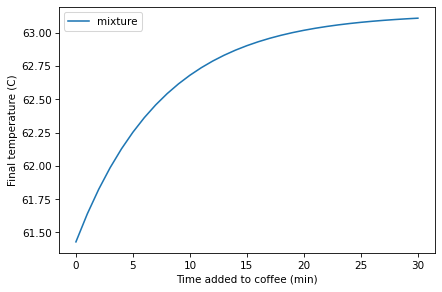

In [26]:
sweep = SweepSeries()
for t_add in linrange(0, 30, 1):
    sweep[t_add] = run_and_mix(t_add, 30)
sweep.plot(label='mixture')
decorate(xlabel='Time added to coffee (min)', ylabel='Final temperature (C)')